## Importing Matplotlib, Pandas, Numpy, Scipy and SKlearn

In [1]:
#Importing all relevant libraries for this assignment
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

In [2]:
#Linux command to obtain the data's filepath 
!dir

 Volume in drive C is OS_Install
 Volume Serial Number is 0A54-9510

 Directory of C:\Users\kdsing2\eLynx Assignment

20-Feb-18  21:20    <DIR>          .
20-Feb-18  21:20    <DIR>          ..
20-Feb-18  20:27    <DIR>          .ipynb_checkpoints
19-Feb-18  21:21             8,893 cruise_ship_info.csv
20-Feb-18  20:27           168,691 eLynx Coding Exercise - Keith Singleton -Copy1.ipynb
20-Feb-18  21:20           152,382 eLynx Coding Exercise - Keith Singleton .ipynb
               3 File(s)        329,966 bytes
               3 Dir(s)  22,357,131,264 bytes free


In [3]:
df1 = pd.read_csv('cruise_ship_info.csv')

In [4]:
df1.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [5]:
df1.Ship_name.value_counts()

Spirit              4
Legend              3
Star                3
Sea                 2
Wind                2
Crown               2
Rhapsody            2
Freedom             2
Sun                 2
Navigator           2
Mariner             2
Pride               2
Jewel               2
Majesty             2
Voyager             2
Dawn                2
Ecstasy             1
Westerdam           1
Magic               1
Ventura             1
Amsterdam           1
Saphire             1
Ryndam              1
Artemis             1
Armonia             1
Pisces              1
Wonder              1
Paradise            1
Enchantment         1
Serena              1
                   ..
Atlantica           1
Infinity            1
Regatta             1
QueenMary2          1
Liberty*            1
Eurodam             1
Allegra             1
Century             1
Xpedition           1
Inspiration         1
Holiday             1
Classica            1
Quest               1
Destiny             1
Valor     

In [6]:
#looking at the first 5 indexed rows
df1.head(5)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [7]:
#Looking at Shape of Data
df1.shape

(158, 9)

In [8]:
#checking object types for each column
df1.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

In [9]:
#checking for missing data
df1.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

## With no missing data & the columns displayed I will now proceed with Step 2
## Calculate Statistics of the data (count, mean, std)

In [10]:
df1.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


Observing the count, mean, std of the variables Age, Tonnage, passengers, length, cabins, passenger_density, and crew


In [11]:
df1.count()         # Get the count of each column

Ship_name            158
Cruise_line          158
Age                  158
Tonnage              158
passengers           158
length               158
cabins               158
passenger_density    158
crew                 158
dtype: int64

In [12]:
df1.mean()                 # Get the mean of each column

Age                  15.689873
Tonnage              71.284671
passengers           18.457405
length                8.130633
cabins                8.830000
passenger_density    39.900949
crew                  7.794177
dtype: float64

In [13]:
df1.std()    # Get the std of each column

Age                   7.615691
Tonnage              37.229540
passengers            9.677095
length                1.793474
cabins                4.471417
passenger_density     8.639217
crew                  3.503487
dtype: float64

Data Correlation

In [14]:
df1.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


## Encoding Categorical Features & Selecting Columns 
I will first encode Ship_name and Cruise_line  through get_dummies. There is no need to use sklearn for this step due to the small size of the data. To determine which columns to use in my model, I will fubd the pearson correlation coefficient through LASSO, the features that return 0 are the features that will be excluded from the final model

One-hot encoding of the categorical features: Ship_name, Cruise_line 
Through get_dummies

In [15]:
ship_dummies = pd.get_dummies(df1['Ship_name'], prefix='ship')
cruise_dummies = pd.get_dummies(df1['Cruise_line'], prefix='cruise')

In [16]:
df1.shape

(158, 9)

In [17]:
ship_dummies.head()

,ship_Adventure,ship_Allegra,ship_Amsterdam,ship_Arcadia,ship_Aries,ship_Armonia,ship_Artemis,ship_Atlantica,ship_Aurora,ship_Brilliance,...,ship_Volendam,ship_Voyager,ship_Westerdam,ship_Whisper,ship_Wind,ship_Wonder,ship_Xpedition,ship_Zaandam,ship_Zenith,ship_Zuiderdam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ship_name and Cruise_line are removed after get_dummies so that I can concat df1 to ship_dummies and cruise_dummies

In [18]:
df1.drop(['Ship_name', 'Cruise_line'], axis=1, inplace=True)

In [19]:
df2 = pd.concat([df1, ship_dummies.iloc[:, 1:], cruise_dummies.iloc[:, 1:]], axis=1)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Columns: 163 entries, Age to cruise_Windstar
dtypes: float64(6), int64(1), uint8(156)
memory usage: 32.8 KB


## Machine Learning Modeling

I will run through the model twice. The first run will include all of the non-categorical features. The second run will be the final model used. I am determining which features to use base upon the lasso coeficient.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Model 1

In [22]:
feature_cols1 = ['Age', 'Tonnage', 'passengers', 'length','cabins', 'passenger_density'] + list(ship_dummies.columns[1:]) + list(cruise_dummies.columns[1:])

In [23]:
X = df2[feature_cols1]
y = df2['crew']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# training error
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
training_error = (1 - np.sqrt(metrics.mean_squared_error(y, y_pred))) 



# testing error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
testing_error = (1 - np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [27]:
training_error

0.84191625043745844

In [28]:
testing_error

0.13007201381528199

This model has an over-fitting problem.
Regularization is used to solve over-fitting problem.  
Coeficients before regularization

In [29]:
lr.coef_

array([ -1.00348899e-02,  -9.23874299e-03,  -4.48273716e-02,
         5.10085139e-01,   7.83174468e-01,   1.79985816e-02,
         3.88948206e-01,  -6.69548305e-02,  -2.61819920e-01,
        -1.10994547e-13,  -1.31228362e-13,  -7.28861416e-14,
        -2.71800824e-01,   9.83657600e-14,  -2.20934382e-14,
         4.72399897e-14,  -1.90542027e-14,   3.60822483e-14,
         4.87237760e-01,   1.32116540e-14,   7.39700477e+00,
         1.47687615e-01,  -3.81708554e-14,  -4.27410561e-01,
         2.05206558e-01,  -2.77104930e-01,   6.73627820e-14,
        -1.93413045e+00,   1.04165721e+00,   9.71412985e-01,
        -2.37297007e-02,  -1.78357329e-13,   6.50590692e-14,
        -9.43315469e-01,   2.63677968e-14,  -7.99651101e-02,
         4.06236049e-01,  -5.49009321e-01,  -8.53345172e-14,
         1.41553436e-15,  -3.44764601e-01,   2.22108337e-01,
         5.05151476e-15,  -2.37323738e-01,   8.45829516e-01,
        -8.88178420e-16,   3.79397138e-01,   3.95292850e-01,
        -1.09674986e-01,

In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

## Coeficients after regularization

In [32]:
lasso.coef_

array([ 0.        ,  0.08863398,  0.        ,  0.        ,  0.        ,
       -0.03554455, -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.  

In [33]:
df1.columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density',
       'crew'],
      dtype='object')

In [34]:
list(zip(feature_cols1, lasso.coef_))

[('Age', 0.0),
 ('Tonnage', 0.088633979447882413),
 ('passengers', 0.0),
 ('length', 0.0),
 ('cabins', 0.0),
 ('passenger_density', -0.035544547065105576),
 ('ship_Allegra', -0.0),
 ('ship_Amsterdam', -0.0),
 ('ship_Arcadia', -0.0),
 ('ship_Aries', 0.0),
 ('ship_Armonia', 0.0),
 ('ship_Artemis', 0.0),
 ('ship_Atlantica', 0.0),
 ('ship_Aurora', 0.0),
 ('ship_Brilliance', 0.0),
 ('ship_Caribbean', 0.0),
 ('ship_Celebration', 0.0),
 ('ship_Century', 0.0),
 ('ship_Classica', 0.0),
 ('ship_Cloud', 0.0),
 ('ship_Conquest', 0.0),
 ('ship_Constellation', 0.0),
 ('ship_Coral', 0.0),
 ('ship_Crown', 0.0),
 ('ship_Dawn', 0.0),
 ('ship_Destiny', -0.0),
 ('ship_Diamond', 0.0),
 ('ship_Dream', -0.0),
 ('ship_Ecstasy', 0.0),
 ('ship_Elation', 0.0),
 ('ship_Emerald', 0.0),
 ('ship_Empress', 0.0),
 ('ship_Enchantment', 0.0),
 ('ship_Eurodam', -0.0),
 ('ship_Europa', 0.0),
 ('ship_Explorer', -0.0),
 ('ship_ExplorerII', -0.0),
 ('ship_Fantasia', -0.0),
 ('ship_Fantasy', 0.0),
 ('ship_Fascination', 0.0),


## Ridge Coeficients after regularization

C:\Users\kdsing2\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0530151034148167e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\kdsing2\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1046446118651583e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\kdsing2\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2290900558002508e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\kdsing2\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix 

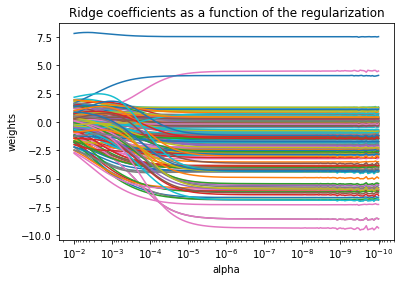

In [35]:
from sklearn import linear_model
X = df2[feature_cols1]
y = df2['crew']

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()    
    

The Ridge coefficient plot shows the estimator of the Ridge Regression. Each color represents a different feature of the coefficient vector.  After a certain number of features the model is overfit. Which is where Lasso comes in to show me exactly which features needed to be dropped. The Ridge Coefficient shows a variance problem. I will drop the features to increase Bias. Less variables means an increase in Bias. 

The model is currently over-fit so I have a variance problem. I must now increase my bias by using less features in the final model.

Using lasso I was able to identify the two columns that will be useful in predicting crew size. passenger_density and Tonnage.

Moving forward I will use tonnage and passenger_density as my X values  and my y value is crew



## Final Machine Learning Model 



In [36]:
feature_cols2 = ['Tonnage', 'passenger_density']  

In [37]:
X = df2[feature_cols2]
y = df2['crew']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# training error
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
training_error = (1 - np.sqrt(metrics.mean_squared_error(y, y_pred))) 



# testing error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
testing_error = (1 - np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [41]:
training_error

-0.23848227131711774

In [42]:
testing_error

-0.33377683792368296

#### The first model had a variance problem, the final model has more bias and less variance.